In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


# Replace with the correct path if it's not in the same directory as the notebook
file_path = r"C:\Users\janel\OneDrive\Documents\IU grad\Research\Water-chem Project\McK water paper\codefiles\GLAQ.csv"
    # path for WW data: "C:\Users\janel\OneDrive\Documents\IU grad\Research\Water-chem Project\WarrenWood data\datafiles\Appendix3_4066subset.csv"
    # or "C:\Users\janel\OneDrive\Documents\IU grad\Research\Water-chem Project\WarrenWood data\datafiles\WWdata_Appendix3.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


Number                                        Description   Temp    pH  \
0      16                  375756088081201_carbonate rock_1B  17.00  7.16   
1      27  382629087362101_non-carbonate sedimentary rock_1B  14.75  6.92   
2      28  382629087362102_non-carbonate sedimentary rock_1B  13.95  6.99   
3      31  382833087193201_non-carbonate sedimentary rock_1B  23.60  6.70   
4      35  383115086590701_non-carbonate sedimentary rock_1B  17.10  7.11   

   O(0)  C(-4)      Ca     Mg     K     Na  ...  Cu          Site.ID  State  \
0  0.46  0.003   82.19  19.43  1.43  27.61  ... NaN  375756088081201     IL   
1  0.09    NaN  170.00  37.00  1.30   5.70  ... NaN  382629087362101     IN   
2  0.08    NaN  130.00  35.00  1.40   7.60  ... NaN  382629087362102     IN   
3  3.30    NaN   86.00  35.00  0.90  16.00  ... NaN  382833087193201     IN   
4  6.70    NaN   98.00  44.00  1.90  37.00  ... NaN  383115086590701     IN   

   Water.use.code  Well.depth.in.meters  Screen.length.in.meters  \
0               P                 25.00                     12.2   
1               U                  6.71                      1.5   
2               U                 12.20                      1.5   
3               U                 15.85                      2.2   
4               U                 20.43                      2.3   

                Bedrock.lithology                       Lithology  Terrane  \
0                  carbonate rock                  carbonate rock       1B   
1  non-carbonate sedimentary rock  non-carbonate sedimentary rock       1B   
2  non-carbonate sedimentary rock  non-carbonate sedimentary rock       1B   
3  non-carbonate sedimentary rock  non-carbonate sedimentary rock       1B   
4  non-carbonate sedimentary rock  non-carbonate sedimentary rock       1B   

                                 Terrane.description  
0  Lower complexity; Generally Pre-Late Wisconsin...  
1  Lower complexity; Generally Pre-Late Wisconsin...  
2  Lower complexity; Generally Pre-Late Wisconsin...  
3  Lower complexity; Generally Pre-Late Wisconsin...  
4  Lower complexity; Generally Pre-Late Wisconsin...  

[5 rows x 39 columns]

"Description" is "Site.ID", "Lithology", 'Terrane' code

In [52]:
# Save the DataFrame to a new CSV file
df.to_csv('GLAC_processed.csv', index=False)

In [53]:
# Group by 'Terrane' and count the number of occurrences
terrane_counts = df.groupby('Terrane').size().reset_index(name='count')

# Display the result
print(terrane_counts)

   Terrane  count
0       1A    934
1       1B    105
2       1C    100
3       1D     59
4       1E     16
5       1F     38
6       1G    971
7       2A    614
8       2B    101
9       2C     87
10      2D    411
11      2E    180
12      3A    128
13      3B    387
14      3C    100
15      4A    223
16      4B     32


In [54]:
# Filter rows where Terrane is '1E'
df_1E = df[df['Terrane'] == '1E']

# Display the 16 rows
#df_1E

In [55]:
# Ensure Terrane is a string
df['Terrane'] = df['Terrane'].astype(str)

# Extract numeric and letter parts
df['TerraneClass'] = df['Terrane'].str.extract(r'(\d)')
df['TerraneSubtype'] = df['Terrane'].str.extract(r'([A-Z])')

In [56]:
# Map numeric class to complexity descriptions
complexity_map = {
    '1': 'Low complexity',
    '2': 'Moderate complexity',
    '3': 'High complexity',
    '4': 'Very high complexity'
}

# Map subtype to geologic descriptions
subtype_map = {
    'A': 'Widespread glacial deposits, mostly sand and gravel',
    'B': 'Pre-Late Wisconsin till, shallow aquifers',
    'C': 'Younger glacial deposits with limited confinement',
    'D': 'Carbonate rocks with minimal overburden',
    'E': 'Thin glacial deposits overlying bedrock',
    'F': 'Sandy lakebed deposits',
    'G': 'Coarse-grained glacial outwash'
}

df['ComplexityDescription'] = df['TerraneClass'].map(complexity_map)
df['GeologicDescription'] = df['TerraneSubtype'].map(subtype_map)


In [57]:
df.head()

Number                                        Description   Temp    pH  \
0      16                  375756088081201_carbonate rock_1B  17.00  7.16   
1      27  382629087362101_non-carbonate sedimentary rock_1B  14.75  6.92   
2      28  382629087362102_non-carbonate sedimentary rock_1B  13.95  6.99   
3      31  382833087193201_non-carbonate sedimentary rock_1B  23.60  6.70   
4      35  383115086590701_non-carbonate sedimentary rock_1B  17.10  7.11   

   O(0)  C(-4)      Ca     Mg     K     Na  ...  Well.depth.in.meters  \
0  0.46  0.003   82.19  19.43  1.43  27.61  ...                 25.00   
1  0.09    NaN  170.00  37.00  1.30   5.70  ...                  6.71   
2  0.08    NaN  130.00  35.00  1.40   7.60  ...                 12.20   
3  3.30    NaN   86.00  35.00  0.90  16.00  ...                 15.85   
4  6.70    NaN   98.00  44.00  1.90  37.00  ...                 20.43   

   Screen.length.in.meters               Bedrock.lithology  \
0                     12.2                  carbonate rock   
1                      1.5  non-carbonate sedimentary rock   
2                      1.5  non-carbonate sedimentary rock   
3                      2.2  non-carbonate sedimentary rock   
4                      2.3  non-carbonate sedimentary rock   

                        Lithology  Terrane  \
0                  carbonate rock       1B   
1  non-carbonate sedimentary rock       1B   
2  non-carbonate sedimentary rock       1B   
3  non-carbonate sedimentary rock       1B   
4  non-carbonate sedimentary rock       1B   

                                 Terrane.description  TerraneClass  \
0  Lower complexity; Generally Pre-Late Wisconsin...             1   
1  Lower complexity; Generally Pre-Late Wisconsin...             1   
2  Lower complexity; Generally Pre-Late Wisconsin...             1   
3  Lower complexity; Generally Pre-Late Wisconsin...             1   
4  Lower complexity; Generally Pre-Late Wisconsin...             1   

   TerraneSubtype  ComplexityDescription  \
0               B         Low complexity   
1               B         Low complexity   
2               B         Low complexity   
3               B         Low complexity   
4               B         Low complexity   

                         GeologicDescription  
0  Pre-Late Wisconsin till, shallow aquifers  
1  Pre-Late Wisconsin till, shallow aquifers  
2  Pre-Late Wisconsin till, shallow aquifers  
3  Pre-Late Wisconsin till, shallow aquifers  
4  Pre-Late Wisconsin till, shallow aquifers  

[5 rows x 43 columns]

In [58]:
# Step 1: Ensure MasterID is a string
df['Site.ID'] = df['Site.ID'].astype(str)

# Step 2: Use regex to keep only 15-digit numeric strings
mask = df['Site.ID'].str.match(r'^\d{15}$')
df_valid = df[mask].copy()  # keep valid rows only

# Step 3: Define the extraction function
def extract_lat_lon_seq(masterid):
    masterid = str(masterid)
    # Latitude: first 6 digits
    lat_d = int(masterid[0:2])
    lat_m = int(masterid[2:4])
    lat_s = int(masterid[4:6])
    lat = lat_d + lat_m / 60 + lat_s / 3600

    # Longitude: next 7 digits
    lon_d = int(masterid[6:9])
    lon_m = int(masterid[9:11])
    lon_s = int(masterid[11:13])
    lon = -(lon_d + lon_m / 60 + lon_s / 3600)

    # Sequence: last 2 digits
    seq = int(masterid[13:15])

    return pd.Series([lat, lon, seq], index=['Latitude', 'Longitude', 'Sequence'])

# Step 4: Apply the function
df_valid[['Latitude', 'Longitude', 'Sequence']] = df_valid['Site.ID'].apply(extract_lat_lon_seq)

# Step 5: (optional) merge back if needed
df.update(df_valid)


In [59]:
df_valid

Number                                        Description   Temp    pH  \
0         16                  375756088081201_carbonate rock_1B  17.00  7.16   
1         27  382629087362101_non-carbonate sedimentary rock_1B  14.75  6.92   
2         28  382629087362102_non-carbonate sedimentary rock_1B  13.95  6.99   
3         31  382833087193201_non-carbonate sedimentary rock_1B  23.60  6.70   
4         35  383115086590701_non-carbonate sedimentary rock_1B  17.10  7.11   
...      ...                                                ...    ...   ...   
4319   11994                  485951122210601_Unconsolidated_1G   9.70  5.70   
4320   11995                  485951122244501_Unconsolidated_1G   9.90  6.00   
4321   11997                  485957122230401_Unconsolidated_1G   9.20  6.00   
4322   11999                  485958122330101_Unconsolidated_1G  11.20  8.90   
4323   12000                  490006122170701_Unconsolidated_1G   9.60  8.20   

      O(0)  C(-4)      Ca     Mg     K      Na  ...  \
0     0.46  0.003   82.19  19.43  1.43   27.61  ...   
1     0.09    NaN  170.00  37.00  1.30    5.70  ...   
2     0.08    NaN  130.00  35.00  1.40    7.60  ...   
3     3.30    NaN   86.00  35.00  0.90   16.00  ...   
4     6.70    NaN   98.00  44.00  1.90   37.00  ...   
...    ...    ...     ...    ...   ...     ...  ...   
4319  6.90    NaN   12.00   2.60  1.70    4.20  ...   
4320  5.40    NaN   39.00  12.00  9.60    6.50  ...   
4321  9.00    NaN   34.00   8.00  4.10    5.40  ...   
4322  0.20    NaN    2.60   1.50  2.90  110.00  ...   
4323  0.80    NaN   37.00   7.30  1.70    6.10  ...   

                           Lithology  Terrane  \
0                     carbonate rock       1B   
1     non-carbonate sedimentary rock       1B   
2     non-carbonate sedimentary rock       1B   
3     non-carbonate sedimentary rock       1B   
4     non-carbonate sedimentary rock       1B   
...                              ...      ...   
4319                  Unconsolidated       1G   
4320                  Unconsolidated       1G   
4321                  Unconsolidated       1G   
4322                  Unconsolidated       1G   
4323                  Unconsolidated       1G   

                                    Terrane.description  TerraneClass  \
0     Lower complexity; Generally Pre-Late Wisconsin...             1   
1     Lower complexity; Generally Pre-Late Wisconsin...             1   
2     Lower complexity; Generally Pre-Late Wisconsin...             1   
3     Lower complexity; Generally Pre-Late Wisconsin...             1   
4     Lower complexity; Generally Pre-Late Wisconsin...             1   
...                                                 ...           ...   
4319  Lower complexity; Residuum and Sediment From t...             1   
4320  Lower complexity; Residuum and Sediment From t...             1   
4321  Lower complexity; Residuum and Sediment From t...             1   
4322  Lower complexity; Residuum and Sediment From t...             1   
4323  Lower complexity; Residuum and Sediment From t...             1   

      TerraneSubtype  ComplexityDescription  \
0                  B         Low complexity   
1                  B         Low complexity   
2                  B         Low complexity   
3                  B         Low complexity   
4                  B         Low complexity   
...              ...                    ...   
4319               G         Low complexity   
4320               G         Low complexity   
4321               G         Low complexity   
4322               G         Low complexity   
4323               G         Low complexity   

                            GeologicDescription   Latitude   Longitude  \
0     Pre-Late Wisconsin till, shallow aquifers  37.965556  -88.136667   
1     Pre-Late Wisconsin till, shallow aquifers  38.441389  -87.605833   
2     Pre-Late Wisconsin till, shallow aquifers  38.441389  -87.605833   
3     Pre-Late Wisconsin till, shallow aquifers  38.47583

In [60]:
# Count missing (NaN) values per column
missing_counts = df.isna().sum()

# Display result
print(missing_counts)


Number                        0
Description                   0
Temp                          0
pH                            0
O(0)                          0
C(-4)                      4184
Ca                            0
Mg                            0
K                            88
Na                            0
Alkalinity                    0
Cl                            0
S(6)                          0
Br                         1849
F                           162
Si                          158
N(5)                        283
N(-3)                       743
P                           750
Al                         2673
As                         2103
Sr                         2669
Ba                         2280
Zn                         2323
Fe                          109
Pb                         2203
Mn                          117
U                          3000
S(-2)                      3984
Cu                         2306
Site.ID                       0
State   

In [61]:
#!pip install folium

import folium
from folium.plugins import MarkerCluster

# Center the map on the median of your lat/lon values
center_lat = df_valid['Latitude'].median()
center_lon = df_valid['Longitude'].median()

# Create base map
m = folium.Map(location=[center_lat, center_lon], zoom_start=6, tiles='OpenStreetMap')

# Optionally: use marker clustering for better visualization
marker_cluster = MarkerCluster().add_to(m)

# Add points to the map
for _, row in df_valid.dropna(subset=['Latitude', 'Longitude']).iterrows():
    popup_text = f"Site.ID: {row['Site.ID']}<br>Terrane: {row['Terrane']}"
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
m


c:\Users\janel\.conda\envs\easg690\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\janel\.conda\envs\easg690\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


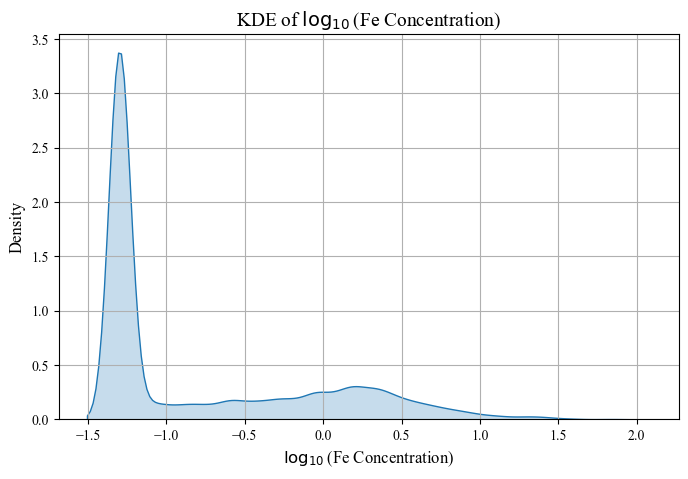

In [62]:

# Set font to Times New Roman
matplotlib.rcParams['font.family'] = 'Times New Roman'

# Clean column names
df.columns = df.columns.str.strip()

# Drop NaNs and filter positive Fe values
fe_values = df['Fe'].dropna()
fe_values = fe_values[fe_values > 0]

# Take log10
fe_log = np.log10(fe_values)

# Plot with proper log₁₀ rendering
plt.figure(figsize=(8, 5))
sns.kdeplot(fe_log, fill=True, bw_adjust=0.5)
plt.title(r'KDE of $\log_{10}$(Fe Concentration)', fontsize=14)
plt.xlabel(r'$\log_{10}$(Fe Concentration)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.show()


In [63]:
# Clean column names just in case
df.columns = df.columns.str.strip()
df["Lithology"] = df["Lithology"].str.capitalize()

# Print all unique values in the 'Lithology' column
print(df['Lithology'].dropna().unique())


['Carbonate rock' 'Non-carbonate sedimentary rock' 'Unconsolidated'
 'Plutonic rock' 'Non-carbonate metamorphic rock' 'Volcanic rock']


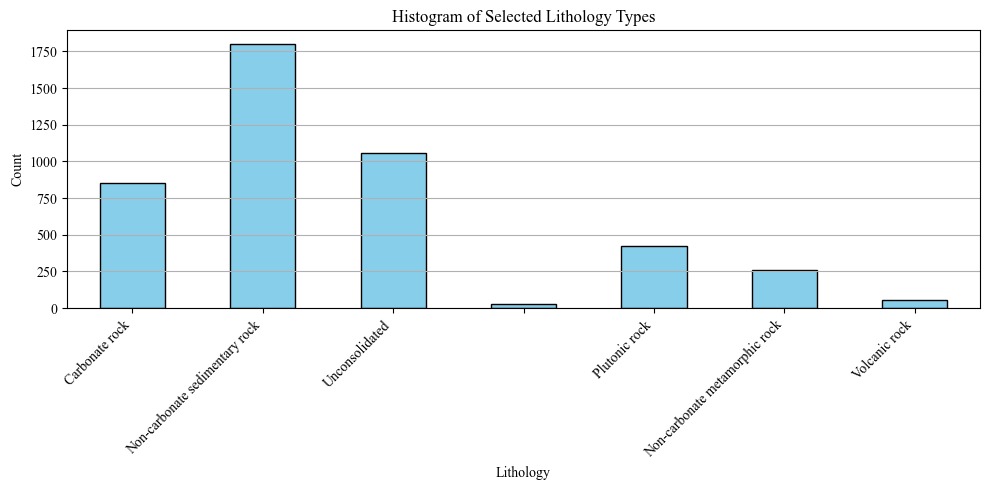

In [66]:
# Clean column names
df.columns = df.columns.str.strip()

# Define target lithologies
target_lithologies = [
    'Carbonate rock',
    'Non-carbonate sedimentary rock',
    'Unconsolidated',
    '',
    'Plutonic rock',
    'Non-carbonate metamorphic rock',
    'Volcanic rock'
]

# Replace NaN with empty string for consistent matching
df['Lithology'] = df['Lithology'].fillna('')

# Filter and count
lith_counts = df['Lithology'].value_counts().reindex(target_lithologies, fill_value=0)

# Plot
plt.figure(figsize=(10, 5))
lith_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.title('Histogram of Selected Lithology Types')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


c:\Users\janel\.conda\envs\easg690\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\janel\.conda\envs\easg690\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\janel\.conda\envs\easg690\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\janel\.conda\envs\easg690\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

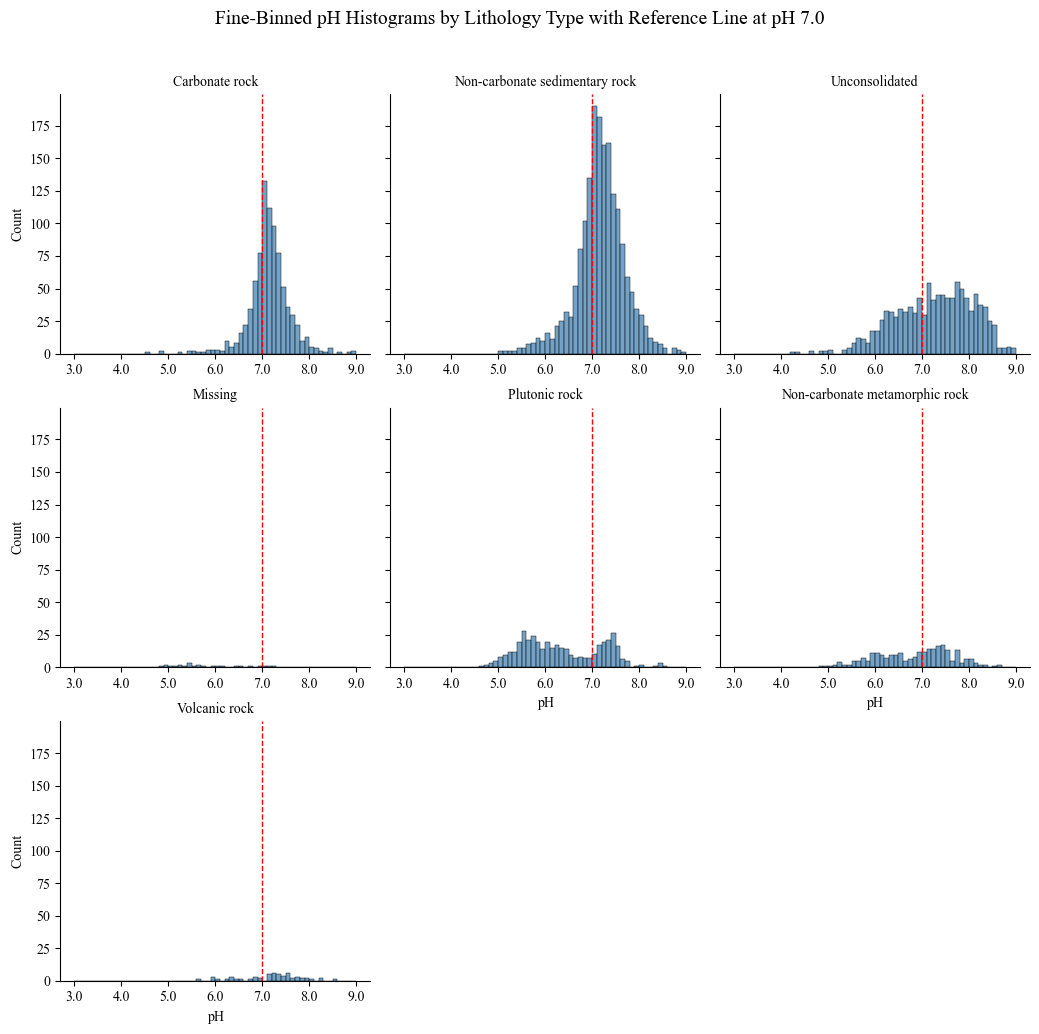

In [67]:
# Filter the DataFrame
df_lith = df[df['Lithology'].isin(target_lithologies)].copy()
df_lith['Lithology'] = df_lith['Lithology'].replace('', 'Missing')

# Plot using FacetGrid with fine bins
g = sns.FacetGrid(df_lith, col='Lithology', col_wrap=3, height=3.5, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='pH', bins=np.arange(3, 9.1, 0.1), kde=False, color='steelblue', edgecolor='black')

# Add vertical bar at x=7
for ax in g.axes.flat:
    ax.axvline(x=7, color='red', linestyle='--', linewidth=1)
    ax.tick_params(labelbottom=True)
    ax.set_xticks(np.arange(3, 10, 1))
    ax.set_xticklabels([f"{x:.1f}" for x in np.arange(3, 9.5, 1)])
# Layout & labels
g.set_titles(col_template='{col_name}')
g.set_axis_labels('pH', 'Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Fine-Binned pH Histograms by Lithology Type with Reference Line at pH 7.0', fontsize=14)
plt.show()
